In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, precision_score, recall_score, f1_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Example of loading data into a pandas DataFrame (replace with your actual data loading)
df = pd.read_csv('data/tmp/encoded_train.csv')
test_df = pd.read_csv('data/tmp/encoded_test.csv')

# Display the first few rows of the dataframe
df.head()


,Day,Month,Hour,Night,Holiday,Block,lat,long,Category,DayOfWeek-Monday,...,StreetType-LN,StreetType-DR,StreetType-CT,StreetType-WAY,StreetType-RW,StreetType-PZ,Season-Winter,Season-Fall,Season-Spring,Season-Summer
0,29,11,0,1,0,0,0.584478,-1.557336,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,1,0,0
1,1,6,8,0,0,1,0.911468,0.775401,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,0,1
2,27,4,6,0,0,1,-2.045603,0.570183,OTHER OFFENSES,0,...,0,0,0,0,0,0,0,0,1,0
3,1,4,15,0,0,32,1.510611,-0.150875,ASSAULT,0,...,0,0,0,0,0,0,0,0,1,0
4,25,7,16,0,0,0,0.718501,0.532851,ASSAULT,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Define features (X) and target (y)
X = df.drop('Category', axis=1)  # Features: all columns except 'Category'
y = df['Category'] 

x_test = test_df.drop('Category', axis=1) # Features: all columns except 'Category'
y_test = test_df['Category']


In [4]:
# Training 25-nn model
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', n_jobs=8)

In [5]:
knn.fit(X, y)

KNeighborsClassifier(metric='manhattan', n_jobs=8, n_neighbors=25)

In [6]:
#y_train_pred = knn.predict(X)

#accuracy = accuracy_score(y, y_train_pred)
#print(f"Accuracy for train dataset: {accuracy}")

In [7]:
# Predict on the test data
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.23470189624736632


In [8]:
precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
f1_scores = f1_score(y_test, y_pred, average=None)

# Round scores
precision_scores = [round(score, 2) for score in precision_scores]
recall_scores = [round(score, 2) for score in recall_scores]
f1_scores = [round(score, 2) for score in f1_scores]

classes = knn.classes_

precision_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1': f1_scores
})

/home/vscode/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


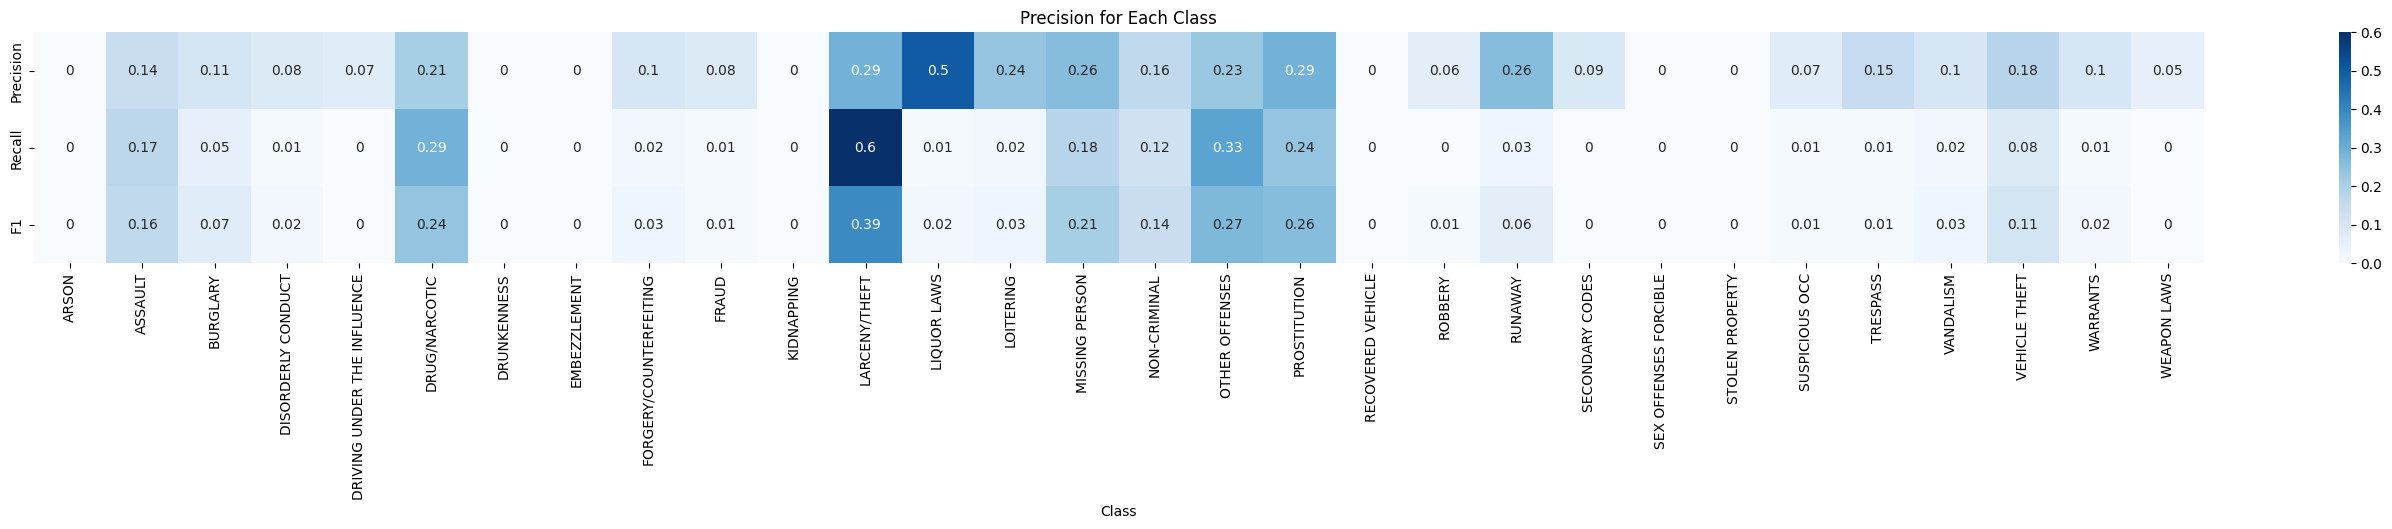

In [9]:
# Plot the DataFrame as a heatmap
plt.figure(figsize=(35, 3))
sns.heatmap(precision_df.set_index('Class').T, annot=True, cmap="Blues")
plt.title('Precision for Each Class')
plt.savefig('models/knn/scores_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
accuracy = balanced_accuracy_score(y_test, y_pred)
print(accuracy)

0.07407316593111714


In [11]:
y_pred_proba = knn.predict_proba(x_test)

In [12]:
label_binarizer = LabelBinarizer()
labelTransformed = label_binarizer.fit_transform(y_test)

df = pd.DataFrame(y_pred_proba, columns=knn.classes_)
df = df[label_binarizer.classes_]

loss = log_loss(labelTransformed, df)
print(f'Log Loss: {loss}')

Log Loss: 7.778252539722212


In [13]:
cnf_matrix = confusion_matrix(y_test, y_pred)

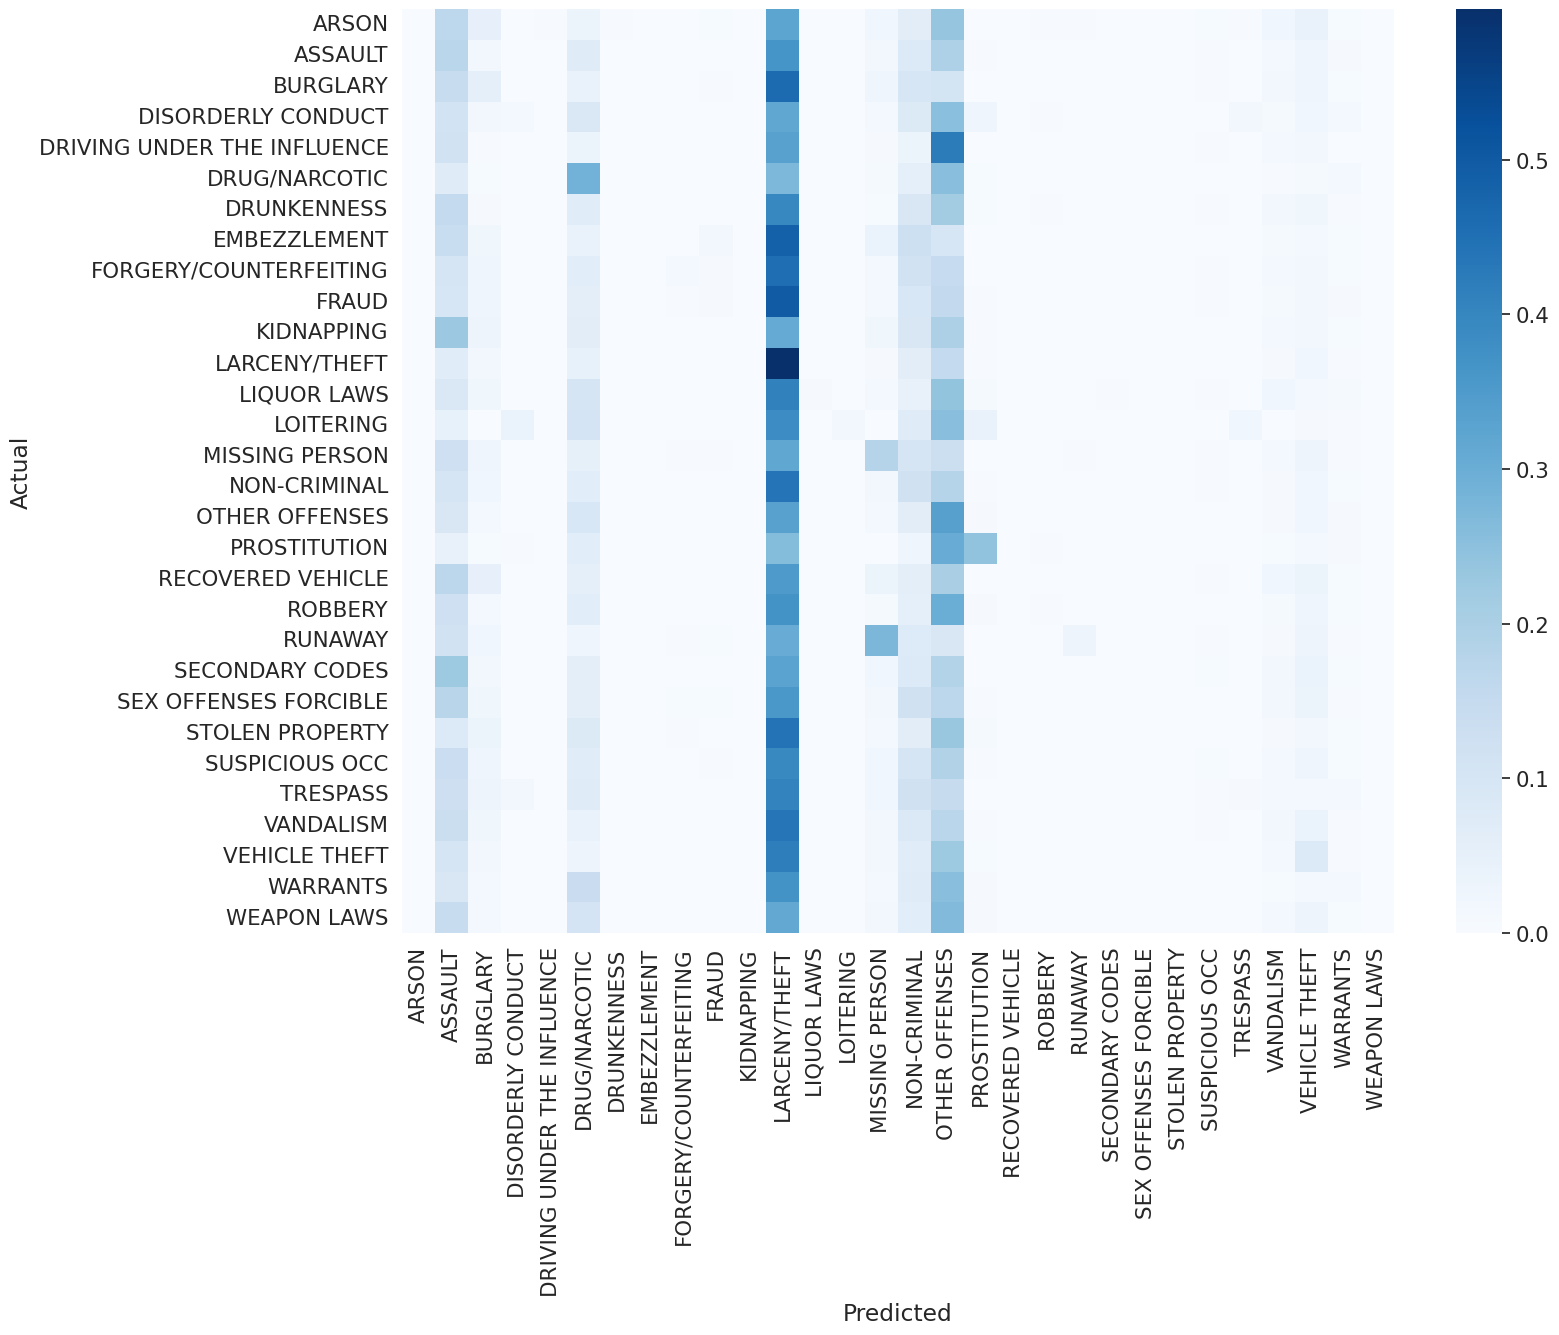

In [14]:
cnf_normalized = cnf_matrix / np.sum(cnf_matrix, axis=1).reshape(-1,1)


df_cm = pd.DataFrame(cnf_normalized, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (16,12))
plt.tight_layout()
sns.set(font_scale=1.4)  # for label size

# Plot the normalized confusion matrix
sns.heatmap(df_cm, cbar=True, cmap= "Blues", annot=False, fmt='.0f' #, annot_kws={"size": 13}
           )
plt.savefig('models/knn/confusion_matrix.png', dpi=300, bbox_inches='tight')

In [15]:
# Save the model
joblib.dump(knn, 'models/knn/knn.pkl')

['models/knn/knn.pkl']